
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Oct 14, 2019)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval **-3 if wrong or not attempted, -1.5 if figure is right but there's a typo**
    * (b) the point estimate **-3 if wrong or not attempted, -1.5 if figure is right but there's a typo**
    * (c) the margin of error. **-3 if wrong or not attempted, -1.5 if figure is right but there's a typo**
   
**If none of the 3 questions in 2 is solved, but the code generates the right plot, -10**
**If 1000 samples were used instead of 10000, but everything else is done correctly, -7 because (b) will be right**

Orgeron    0.5181
Saban      0.4819
Name: vote, dtype: float64
a: The 95% confidence interval is (0.5076975, 0.5279025)
b: The point estimate is 0.518
c: The margin of error is +/- 0.01
Ed Orgeron is likely the winner within a 95% confidence interval


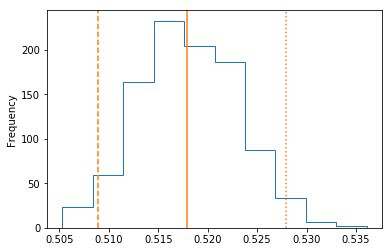

In [15]:
import math
import io
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import scipy.optimize
import scipy.spatial
largepoll = pd.read_csv('poll-larger.csv')
print(largepoll['vote'].value_counts(normalize=True))
def sample(O,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < O,'Orgeron','Saban')})
def samplingdist(O,n=1000):
    return pd.DataFrame([sample(O,n)['vote'].value_counts(normalize=True) for i in range(1000)])
def quantiles(O,n=1000):
    distDF = samplingdist(O,n)
    return distDF['Orgeron'].quantile(0.025), distDF['Orgeron'].quantile(0.975)
distDF = samplingdist(0.5181,10000)
distDF['Orgeron'].plot(kind='hist', histtype='step')
plt.axvline(distDF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(distDF['Orgeron'].quantile(0.500), c='C1')
plt.axvline(distDF['Orgeron'].quantile(0.975), c='C1',linestyle=':')

quantile2p5, quantile97p5 = quantiles(.5181,10000)

print(f"a: The 95% confidence interval is {quantile2p5, quantile97p5}")
print(f"b: The point estimate is {round((quantile2p5+quantile97p5)/2,3)}")
print(f"c: The margin of error is +/- {round((quantile97p5-quantile2p5)/2,2)}")
print("Ed Orgeron is likely the winner within a 95% confidence interval")